In [1]:
from rmgpy import settings
from rmgpy.data.rmg import RMGDatabase
from rmgpy.species import Species
from IPython.display import display
from rmgpy.rmg.main import RMG
from rmgpy.cantherm.output import prettify

In [2]:
database = RMGDatabase()

In [3]:
database.load(settings['database.directory'], thermoLibraries='none',\
             kineticsFamilies='none', kineticsDepositories='none', reactionLibraries = [])

thermoDatabase = database.thermo

## Check exact match to leaves

In [4]:
inputFile = 'polycyclic_qm_inputs/input_total.py'
rmg = RMG()
rmg.loadThermoInput(inputFile)

In [5]:
for spec in rmg.initialSpecies:
    mole = spec.molecule[0]
    estimatedThermo = thermoDatabase.computeGroupAdditivityThermo(mole)
    ringGroups, polycyclicGroups = thermoDatabase.getRingGroupsFromComments(estimatedThermo)
    assert len(polycyclicGroups) == 1
    if spec.label != polycyclicGroups[0].label:
        display(spec)
        print spec.label
        print spec.label, polycyclicGroups[0].label
        print '**********************'

## Check average match to nodes

In [6]:
inputFile2 = 'polycyclic_qm_inputs/input_nodes.py'
rmg2 = RMG()
rmg2.loadThermoInput(inputFile2)

Averaging thermo data over 3 value(s).
Averaging thermo data over 10 value(s).
Averaging thermo data over 3 value(s).


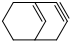

s3_6_6_ene_yne_1_8
s3_6_6_ene_yne_1_8 s3_6_6
**********************


In [7]:
for spec in rmg2.initialSpecies:
    mole = spec.molecule[0]
    estimatedThermo = thermoDatabase.computeGroupAdditivityThermo(mole)
    ringGroups, polycyclicGroups = thermoDatabase.getRingGroupsFromComments(estimatedThermo)
    assert len(polycyclicGroups) == 1
    if spec.label != polycyclicGroups[0].label:
        display(spec)
        print spec.label
        print spec.label, polycyclicGroups[0].label
        print '**********************'